# Regresión

Vamos a trabajar con un dataset sobre precios de casas en boston:

- CRIM per capita crime rate by town
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS proportion of non-retail business acres per town
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX nitric oxides concentration (parts per 10 million)
- RM average number of rooms per dwelling
- AGE proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centres
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per \$10,000
- PTRATIO pupil-teacher ratio by town
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
- LSTAT % lower status of the population
- MEDV Median value of owner-occupied homes in $1000’s

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('boston_house_prices.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [180]:
# boston_data = load_boston()
# df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
# df['target'] = pd.Series(boston_data.target)
# df.head()

In [181]:
#df.drop(['B'],axis=1,inplace=True)

¿ Hay nulos ?

In [182]:
# COMPLETAR
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Imprimir descripción del dataset:

In [183]:
# COMPLETAR

df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


¿ Hay variables correlacionadas entre sí ?

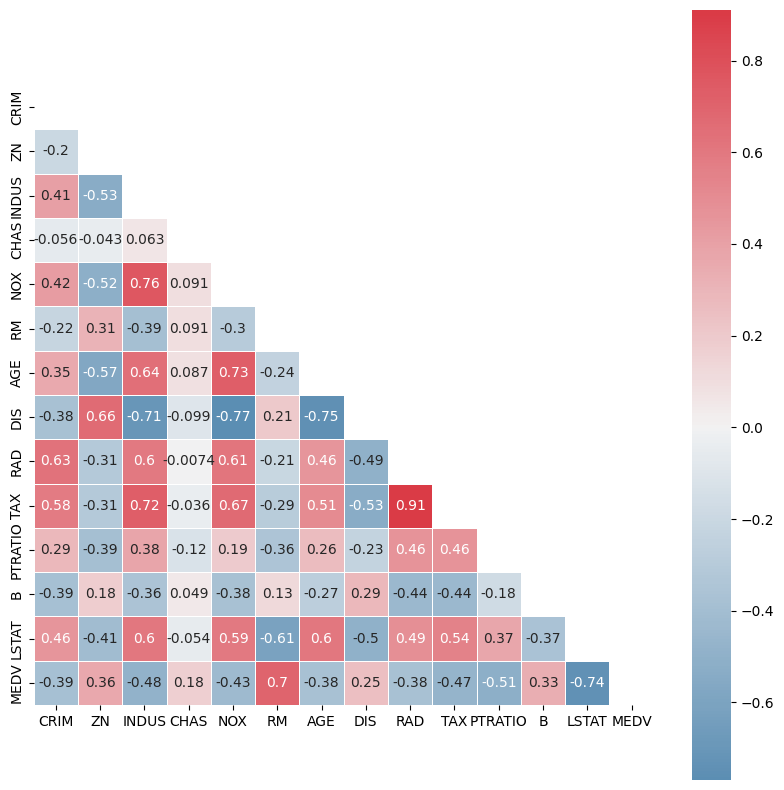

In [184]:
# COMPLETAR
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, annot=True)
plt.show()

En OLS no es bueno poner variables que esten correlacionadas entre sí.

Por lo tanto, descartemos las variables que tienen una alta correlación (más de 0.9) y nos quedemos con 1 sola de ellas:

In [185]:
# COMPLETAR
df = df.drop(["TAX"], axis=1)

¿ Cómo se distribuye nuestro target ?

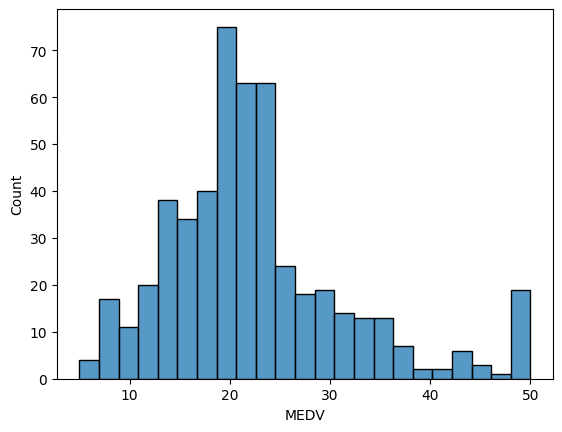

In [186]:
# COMPLETAR
sns.histplot(data=df, x="MEDV")
plt.show()

# Train - Test split

Ahora, vamos a comenzar entrenando un modelo de regresión lineal de sklearn. Primero que nada, separemos en train - test.

Dejemos un 20% de los datos reservados para test y un random_state=42 para obtener todos los mismos resultados:

In [187]:
# COMPLETAR
from sklearn.model_selection import train_test_split

X = df.drop(["MEDV"], axis=1)
y = df["MEDV"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 12)
(102, 12)
(404,)
(102,)


# Linear regression

Comenzaremos implementando una regresión lineal simple, utilizando Sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

En principio seleccionemos 1 sola variable como feature (puede ser por ejemplo, la que tenía la correlación más fuerte con el target)

In [188]:
# COMPLETAR

X_train_1 = X_train[["LSTAT"]].copy()
X_test_1 = X_test[["LSTAT"]].copy()

Importamos LinearRegression

In [189]:
# COMPLETAR
from sklearn.linear_model import LinearRegression

Entrenamos el modelo:

In [190]:
# COMPLETAR

reg = LinearRegression().fit(X_train_1 , y_train)

Y validamos su score en train y en test (si se fijan en la documentación, el LinearRegression ya trae un método para calcular el score)  
<span style='color:peru'>En este algoritmo de regresion ***reg.score()*** es el $R^2$ coeficiente de determinación.</span>  
$$R^2 = 1 - \frac{\displaystyle\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\displaystyle\sum_{i=1}^{n}(y_i - \bar{y})^2}$$
  
$$R^2 = \frac{\displaystyle\sum_{i=1}^{n}(\hat{y}_i-\bar{y})^2}{\displaystyle\sum_{i=1}^{n}(y_i - \bar{y})^2}$$  

si y solo si $$\color{peru}{\displaystyle\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}=\displaystyle\sum_{i=1}^{n}(y_i - \bar{y})^2-\displaystyle\sum_{i=1}^{n}(\hat{y}_i-\bar{y})^2$$
<span style='color:peru'>Y eso solo se da para los datos de ajuste o "entrenamiento" NO para los de test. Por eso mejor utilizar la fórmula de más arriba.</span>

Formulación Matricial:   
$$R^2=1-\frac{(y-\hat y)^T(y-\hat y)}{(y-\bar y)^T(y-\bar y)}=1-\frac{\hat{e}^T\hat{e}}{\bar{e}^T\bar{e}}$$

In [191]:
# COMPLETAR
reg.score(X_train_1, y_train)

0.5423180734793516

In [192]:
# COMPLETAR
reg.score(X_test_1, y_test)

0.5429180422970384

In [193]:
y_train_pred = reg.predict(X_train_1)
y_test_pred = reg.predict(X_test_1)
ytrain_m=y_train.mean()
ytest_m=y_test.mean()
ep_train=y_train_pred-y_train
ep_test=y_test_pred-y_test
e_train=y_train-ytrain_m
e_test=y_test-ytest_m
r2_train=1-(np.dot(ep_train,ep_train)/np.dot(e_train,e_train))
r2_test=1-(np.dot(ep_test,ep_test)/np.dot(e_test,e_test))
# y_train_pred.shape
print(r2_train,r2_test)
print(reg.score(X_train_1, y_train),reg.score(X_test_1, y_test))

0.5423180734793517 0.5429180422970383
0.5423180734793516 0.5429180422970384


In [194]:
y_train_pred = reg.predict(X_train_1)
y_test_pred = reg.predict(X_test_1)
ytrain_m=y_train.mean()
ytest_m=y_test.mean()
ep_train=y_train_pred-ytrain_m
ep_test=y_test_pred-ytest_m
e_train=y_train-ytrain_m
e_test=y_test-ytest_m
r2_train=np.dot(ep_train,ep_train)/np.dot(e_train,e_train)
r2_test=np.dot(ep_test,ep_test)/np.dot(e_test,e_test)
# y_train_pred.shape
print(r2_train,r2_test)
print(reg.score(X_train_1, y_train),reg.score(X_test_1, y_test))

0.5423180734793522 0.6638956653408097
0.5423180734793516 0.5429180422970384


Al trabajar con una única feature, podemos graficar.

Graficar un scatterplot que contenga:
- Puntos para los datos de entrenamiento (X_test, y_test)
- Puntos para los datos de test en otro color (Usar hue)
- Una linea con la regresión (predicciones que genera nuestro modelo) en train
- Misma linea pero para test

Para esto, van a necesitar guardar las predicciones (su "y_test_pred" y "y_train_pred") en 2 listas:

In [195]:
# COMPLETAR
y_train_pred = reg.predict(X_train_1)
y_test_pred = reg.predict(X_test_1)

In [196]:
X_test_1['LSTAT']

173     9.04
274     3.53
491    18.07
72      5.52
452    17.27
       ...  
412    34.37
436    18.05
411    21.22
86     12.86
75      8.94
Name: LSTAT, Length: 102, dtype: float64

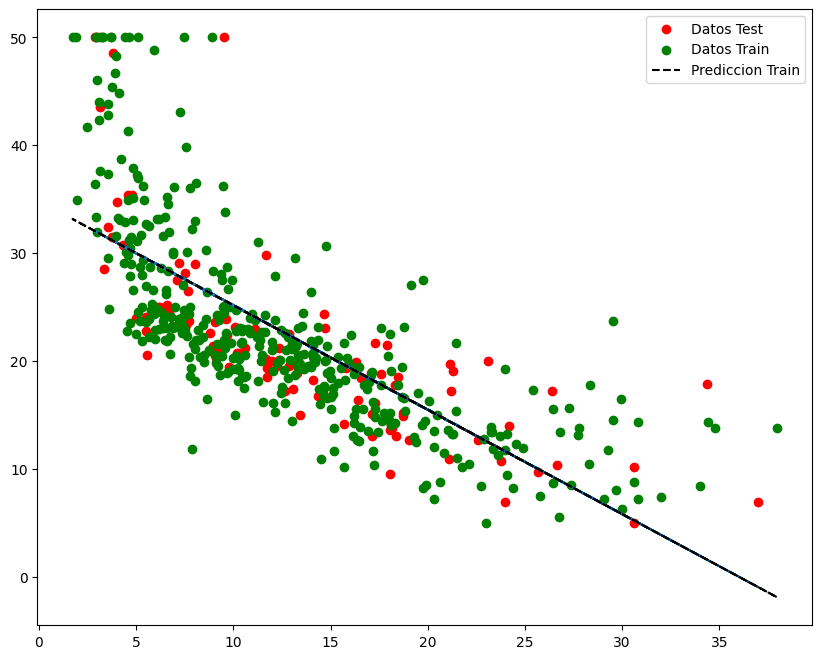

In [197]:
plt.figure(figsize = (10,8))

plt.scatter(X_test_1, y_test,  color='red', label = 'Datos Test')
plt.plot(np.array(X_test_1), y_test_pred)

plt.scatter(X_train_1, y_train,  color='green', label = 'Datos Train')
plt.plot(np.array(X_train_1), y_train_pred, color='k', linestyle = '--', label = 'Prediccion Train')

plt.legend()
plt.show()

Ahora, agreguemos una feature más al modelo y hagamos lo mismo:

In [198]:
# COMPLETAR

X_train_2 = X_train[["LSTAT", "RM"]].copy()
X_test_2 = X_test[["LSTAT", "RM"]].copy()

reg = LinearRegression().fit(X_train_2, y_train)

Vemos que ya empieza a haber una diferencia significativa en los scores entre train y test. Por último, agreguemos todas las features y midamos los R squared:

In [199]:
# COMPLETAR

print(reg.score(X_train_2, y_train))
print(reg.score(X_test_2, y_test))

0.6501592679428922
0.5739577415025859


Vemos que nuestro modelo se ajusta bastante mejor a los datos de train que de test. 

Si vemos en la documentación, hay 2 atributos que nos pueden interesar:

- coef_
- intercept_

¿ Qué significan cada uno ?

Imprimirlos

In [200]:
reg.coef_

# y(F1,F2) = a*F1 + b*F2 + c

array([-0.63249856,  5.46509877])

In [201]:
# COMPLETAR
reg.intercept_

-3.841177079004872

Medir el mean squared error (Sklearn tiene la implementacion)

In [202]:
# COMPLETAR

from sklearn.metrics import mean_squared_error

y_train_hat_2 = reg.predict(X_train_2)
y_test_hat_2 = reg.predict(X_test_2)

print('mse para train:', mean_squared_error(y_train, y_train_hat_2))
print('mse para test:', mean_squared_error(y_test, y_test_hat_2))


mse para train: 30.39185519321462
mse para test: 31.243290601783624


Cálculo Manual

In [203]:
ep_train=y_train_hat_2-y_train
ep_test=y_test_hat_2-y_test

print('mse para train:', np.dot(ep_train,ep_train)/len(y_train))
print('mse para test:', np.dot(ep_test,ep_test)/len(y_test))

mse para train: 30.39185519321462
mse para test: 31.243290601783624


# Árboles de decision

Ahora, vamos a tratar de hacer lo mismo pero utilizando árboles de decision.

Vimos que sklearn tiene una implementación para esto: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

Importar el decision tree regressor:

In [204]:
# COMPLETAR
from sklearn.tree import DecisionTreeRegressor

Vamos a hacer lo mismo que la clase pasada: Armar un listado de max_depths, entrenarlo y generar predicciones para cada elemento de la lista y decidir cuál es el mejor valor para max_depth.

En este caso, en lugar de medir el fscore, mediremos el MSE (mean squared error) para comparar con los resultados obtenidos en la regresión lineal

In [205]:
# COMPLETAR
max_depths = np.arange(1, 20)
train_scores = []
test_scores = []

In [206]:
for i in max_depths:
    tree = DecisionTreeRegressor(max_depth=i)

    tree.fit(X_train, y_train)
    train_preds = tree.predict(X_train)
    test_preds = tree.predict(X_test)

    train_scores.append(mean_squared_error(y_train, train_preds))
    test_scores.append(mean_squared_error(y_test, test_preds))

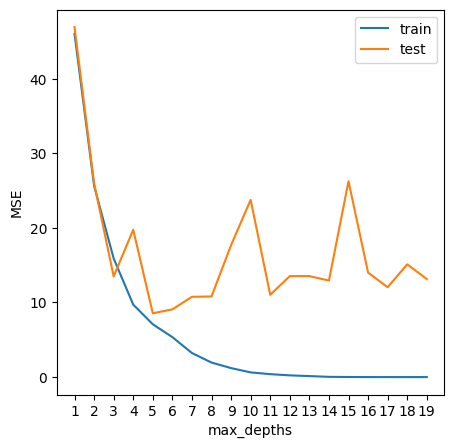

In [207]:
plt.figure(figsize=(5,5))

plt.plot(max_depths, train_scores, label="train")
plt.plot(max_depths, test_scores,  label="test")
plt.xticks(max_depths)
plt.xlabel('max_depths')
plt.ylabel('MSE')
plt.legend()
plt.show()


<span style='color:peru'>Ahora se usa funcion con validación cruzada.</span>

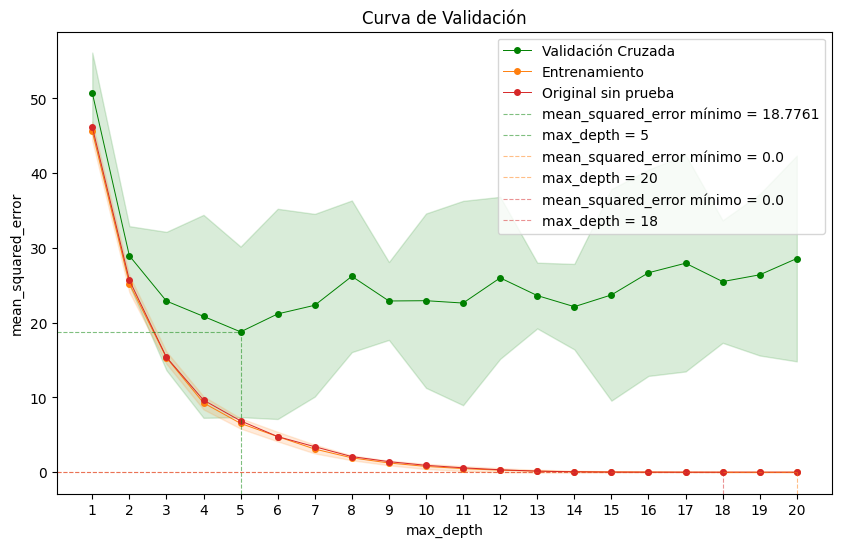

In [208]:
from f_func import bestParam
tree = DecisionTreeRegressor(max_depth=3)
_=bestParam(X,y,tree,['max_depth',1,20],mean_squared_error,maxim=0,cv=5,g=1,fig=(10,6),colores=['green','#FF7F0E','#D62728'])

Vemos como el error va disminuyendo a medida que aumenta el max depth, pero a partir de la profundidad 5, se separan ambas lineas (comienza a overfittear) por lo que avanzaremos con un max_depth=5.

Entrenar el árbol con max_depth=5 y medir el mean_squared_error:

In [209]:
tree = DecisionTreeRegressor(max_depth=5,random_state=2)

tree.fit(X_train, y_train)

train_preds = tree.predict(X_train)
test_preds = tree.predict(X_test)


print(mean_squared_error(y_train, train_preds))
print(mean_squared_error(y_test, test_preds))

7.078696760120875
8.423318349352725


In [210]:
# COMPLETAR

print(mean_squared_error(y_train, train_preds))

7.078696760120875


In [211]:
print(mean_squared_error(y_test, test_preds))

8.423318349352725


Vemos como podemos obtener mucho mejores resultados con un simple árbol de decisión.

# KNN

Ahora, probemos KNN.

Vimos que KNN se puede utilizar para regresión y lo que hace es tomar una media ponderada de los vecinos más cercanos.

Importemos knn regressor de sklearn:

In [212]:
# COMPLETAR
from sklearn.neighbors import KNeighborsRegressor

Recuerden que en KNN, es importante escalar los datos. Por lo tanto, vamos a escalar X_train y X_test con un standard scaler.

Escalar los datos:

In [213]:
# COMPLETAR
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
columnas_X_train = X_train.columns
columnas_X_test = X_test.columns
X_train[columnas_X_train] = scaler.transform(X_train)
X_test[columnas_X_test] = scaler.transform(X_test)

In [214]:
type(X_train)

pandas.core.frame.DataFrame

Ahora, vamos a entrenar el modelo con distintos valores de K, al igual que hicimos con la profundidad de los arboles.

Entrenar knn con k desde 1 hasta 20 y decidir cuál es el mejor valor:

In [215]:
# COMPLETAR
K = np.arange(1, 20)
train_scores = []
test_scores = []

In [221]:
for i in K:
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)

    train_preds = knn.predict(X_train)
    test_preds = knn.predict(X_test)

    # train_scores.append(np.sqrt(mean_squared_error(y_train, train_preds)))
    # test_scores.append(np.sqrt(mean_squared_error(y_test, test_preds)))
    train_scores.append(mean_squared_error(y_train, train_preds))
    test_scores.append(mean_squared_error(y_test, test_preds))
min(test_scores)

16.72093137254902

Observando el gráfico, decidir el mejor valor de K y volver a entrenar knn.

Luego, medir el MSE y comparar con los modelos anteriores:

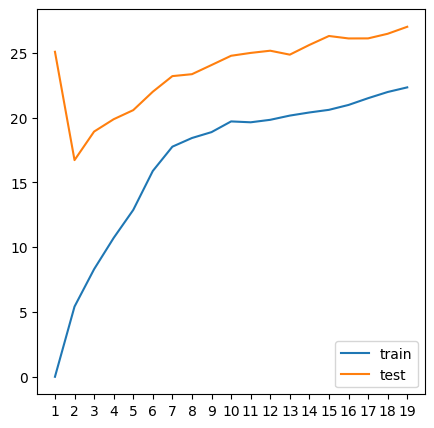

In [217]:
# COMPLETAR

plt.figure(figsize=(5,5))

plt.plot(max_depths, train_scores, label="train")
plt.plot(max_depths, test_scores,  label="test")
plt.xticks(max_depths)
plt.legend()
plt.show()

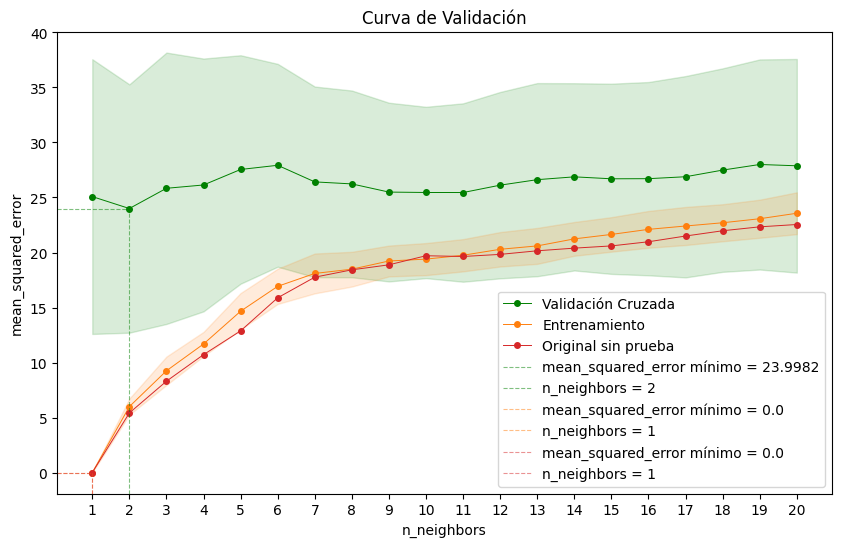

In [218]:
_=bestParam(X_train,y_train,knn,['n_neighbors',1,20],mean_squared_error,maxim=0,cv=5,g=1,fig=(10,6),colores=['green','#FF7F0E','#D62728'])

¿ Conclusiones ?